# 1. 필요 모듈 다운로드 

```python
!pip install gensim

!pip install pyLDAvis

```

> 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)

토픽 모델링은 문서의 집합에서 토픽을 찾아내는 프로세스를 말합니다.

> LDA 토픽모델링

"인간을 위한 토픽 모델링 (topic modelling for humans)"라는 모토를 가진 
gensim : 쉬운 문법으로 이뤄짐



In [1]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
import numpy as np

In [2]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


/Users/kim-yewon/second_day/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


# 2.데이터 크롤링

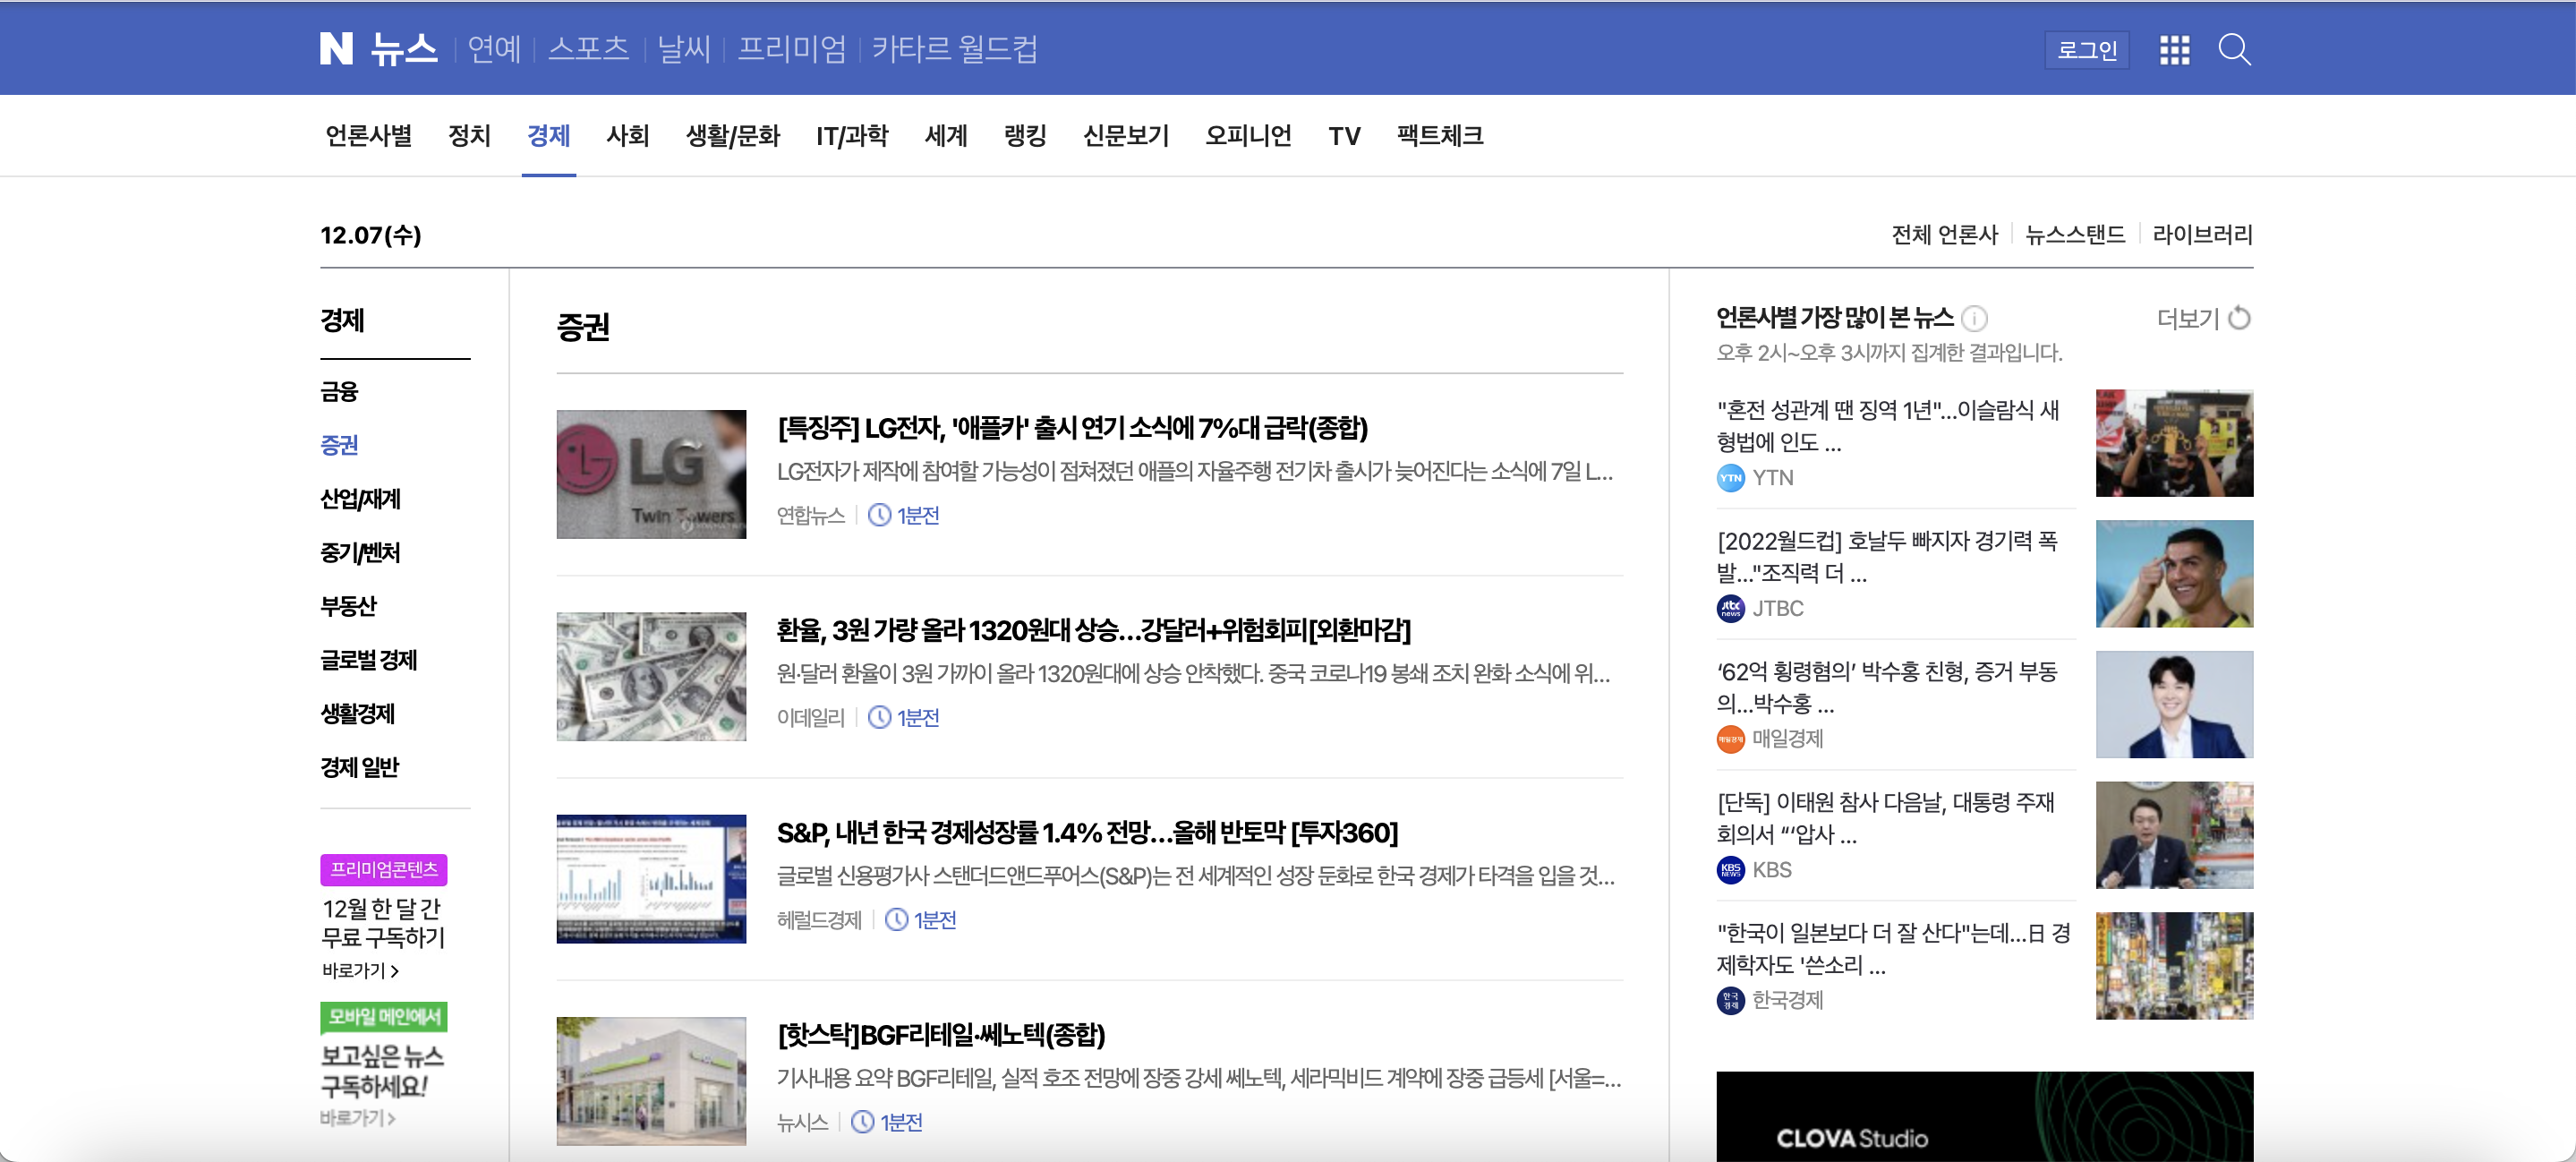

In [4]:
# 네이버 뉴스 경제 - 증권 페이지 1 - 30 크롤링

def search_news(date):
    import requests
    from bs4 import BeautifulSoup
    news_info ={}
    results =[]
    # 증권세션의 url 
    for page in range(1,31):
        url = f'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=101&sid2=258&date='+ date + '&page=' + str(page)
        # pasing
        # url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=101&sid2=258'
        r = requests.get(url,headers={'user-agent':'chrome'})
        html = r.text
        soup = BeautifulSoup(html ,'lxml')
        head_line1 = soup.select('.type06_headline > li:nth-child(n) > dl > dt:nth-child(2) > a')
        head_line2 = soup.select('.type06> li:nth-child(n) > dl > dt:nth-child(2) > a')
        head_line = head_line1 + head_line2
        for news in head_line:
            results.append(news.text.strip())
            # results.append({'제목' : news.text.strip()})
             # , 'url': news['href']
    return results


In [5]:
# 날짜 함수 부분
r = search_news('20221206')

# 3. 데이터 정제

In [6]:
#정렬
r = sorted(r)

In [7]:
#특수문자 제거
import re
for sent in range(len(r)):
    r[sent] = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', r[sent])
    r[sent]= ' '.join(r[sent].split())
#특수문자 제거하고 띄어쓰기 단위로 리스트 저장
db = []
for sent in r:
    db.append(sent.split(" "))

<>:4: DeprecationWarning: invalid escape sequence \?
<>:4: DeprecationWarning: invalid escape sequence \?
/var/folders/yj/661v5ck10fs9l1w83h2th0300000gn/T/ipykernel_39759/1891913514.py:4: DeprecationWarning: invalid escape sequence \?
  r[sent] = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', r[sent])


In [8]:
#불용어 처리, 해당 되면 제외하고 새로 저장
stop_word = ['데이터로','특징주','코스피','2022자본투자대상','포토']
result1 = []
for i in range(len(db)):
    if not(db[i][0]) in stop_word:
        result1.append([" ".join(db[i][:3])])
result1    

[['2 500억 모집에'],
 ['CPI만 더 내려간다면'],
 ['Fed 내년 2월도'],
 ['IPO 시장 급랭'],
 ['JP모건 영업레버리지 플러스로'],
 ['美 금리 5%'],
 ['美 베어마켓 랠리'],
 ['금리 인상기 변동금리부채권'],
 ['내년 상반기 저점'],
 ['배당률 5% 넘는'],
 ['상하이 공장 생산량'],
 ['수익성 개선 기대감'],
 ['싸고 질 좋은'],
 ['애플이 한대요 안한대요'],
 ['어쩌나 삼성전자 주가'],
 ['중국 리오프닝 수혜'],
 ['지금 사면 5%'],
 ['최대한 싸게 가야'],
 ['최악은 지났다 둔촌주공'],
 ['코넥스시장 유동성 늘어나면'],
 ['코넥스시장 유동성 확대되면'],
 ['투자자들 달러 대신'],
 ['하락장서 750% 폭등'],
 ['IPO 잔혹사 공모'],
 ['IPO 재도전 자람테크놀로지'],
 ['IPO 재수생 자람테크놀로지'],
 ['LG화학 비야디 동시'],
 ['경기침체에도 방어 BGF리테일'],
 ['계열사 임원 불법대출'],
 ['닥터둠 루비니 역대급'],
 ['보합에 진정 CP금리'],
 ['실적 혹한기 벗어나나'],
 ['역마진 공포 증권사'],
 ['오늘 마감 시황은'],
 ['오늘 마감 시황은'],
 ['원전 비중 70%'],
 ['위믹스 상폐 가처분'],
 ['위믹스 운명의 날'],
 ['전석 매진 NCT'],
 ['중국 내년 2분기까지'],
 ['코리아 디스카운트 해소'],
 ['코스닥 하락 마감'],
 ['페이코 서명키 유출에'],
 ['하락 마감한 코스피'],
 ['영상 해외여행 수요'],
 ['영상 SAMG엔터 상장'],
 ['주 에스에이엠지엔터테인먼트 코스닥시장'],
 ['10월 독일 공장'],
 ['11월 영국 소매판매'],
 ['11조 황금입지 용산'],
 ['2022년 DMC이노베이션캠프 창업경진대회'],
 ['2023년엔 신흥국이 뜬다'],
 ['2만명이 선택한 아이에스동서'],
 ['30대 상무 40대'],
 ['3중고 뚫고 HLB'

In [9]:
# results1 데이터 정제

# 4. LDA

In [10]:
processed_data = pd.DataFrame(result1)

In [11]:
processed_data[0] = processed_data[0].replace("", np.nan)

In [12]:
processed_data = processed_data[processed_data[0].notnull()]

In [13]:
processed_data = processed_data.values.tolist()
processed_data2=[]
for i in processed_data:
    i = list(filter(None, i))
    processed_data2.append(i)
processed_data = processed_data2
processed_data

[['2 500억 모집에'],
 ['CPI만 더 내려간다면'],
 ['Fed 내년 2월도'],
 ['IPO 시장 급랭'],
 ['JP모건 영업레버리지 플러스로'],
 ['美 금리 5%'],
 ['美 베어마켓 랠리'],
 ['금리 인상기 변동금리부채권'],
 ['내년 상반기 저점'],
 ['배당률 5% 넘는'],
 ['상하이 공장 생산량'],
 ['수익성 개선 기대감'],
 ['싸고 질 좋은'],
 ['애플이 한대요 안한대요'],
 ['어쩌나 삼성전자 주가'],
 ['중국 리오프닝 수혜'],
 ['지금 사면 5%'],
 ['최대한 싸게 가야'],
 ['최악은 지났다 둔촌주공'],
 ['코넥스시장 유동성 늘어나면'],
 ['코넥스시장 유동성 확대되면'],
 ['투자자들 달러 대신'],
 ['하락장서 750% 폭등'],
 ['IPO 잔혹사 공모'],
 ['IPO 재도전 자람테크놀로지'],
 ['IPO 재수생 자람테크놀로지'],
 ['LG화학 비야디 동시'],
 ['경기침체에도 방어 BGF리테일'],
 ['계열사 임원 불법대출'],
 ['닥터둠 루비니 역대급'],
 ['보합에 진정 CP금리'],
 ['실적 혹한기 벗어나나'],
 ['역마진 공포 증권사'],
 ['오늘 마감 시황은'],
 ['오늘 마감 시황은'],
 ['원전 비중 70%'],
 ['위믹스 상폐 가처분'],
 ['위믹스 운명의 날'],
 ['전석 매진 NCT'],
 ['중국 내년 2분기까지'],
 ['코리아 디스카운트 해소'],
 ['코스닥 하락 마감'],
 ['페이코 서명키 유출에'],
 ['하락 마감한 코스피'],
 ['영상 해외여행 수요'],
 ['영상 SAMG엔터 상장'],
 ['주 에스에이엠지엔터테인먼트 코스닥시장'],
 ['10월 독일 공장'],
 ['11월 영국 소매판매'],
 ['11조 황금입지 용산'],
 ['2022년 DMC이노베이션캠프 창업경진대회'],
 ['2023년엔 신흥국이 뜬다'],
 ['2만명이 선택한 아이에스동서'],
 ['30대 상무 40대'],
 ['3중고 뚫고 HLB'

In [14]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [15]:
# 고유한 단어 사전
dictionary = corpora.Dictionary(processed_data)

2022-12-08 13:06:11,778 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-12-08 13:06:11,780 : INFO : built Dictionary<356 unique tokens: ['2 500억 모집에', 'CPI만 더 내려간다면', 'Fed 내년 2월도', 'IPO 시장 급랭', 'JP모건 영업레버리지 플러스로']...> from 388 documents (total 388 corpus positions)
2022-12-08 13:06:11,781 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<356 unique tokens: ['2 500억 모집에', 'CPI만 더 내려간다면', 'Fed 내년 2월도', 'IPO 시장 급랭', 'JP모건 영업레버리지 플러스로']...> from 388 documents (total 388 corpus positions)", 'datetime': '2022-12-08T13:06:11.781113', 'gensim': '4.2.0', 'python': '3.9.13 (main, Nov  9 2022, 17:41:22) \n[Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-13.0-arm64-arm-64bit', 'event': 'created'}


In [16]:
# 사전 필터링 -> 빈도 2이하 제외, 50% 단어 제외
dictionary.filter_extremes(no_below=3, no_above=0.5)

2022-12-08 13:06:11,783 : INFO : discarding 350 tokens: [('2 500억 모집에', 1), ('CPI만 더 내려간다면', 1), ('Fed 내년 2월도', 1), ('IPO 시장 급랭', 1), ('JP모건 영업레버리지 플러스로', 1), ('美 금리 5%', 1), ('美 베어마켓 랠리', 1), ('금리 인상기 변동금리부채권', 1), ('내년 상반기 저점', 1), ('배당률 5% 넘는', 1)]...
2022-12-08 13:06:11,784 : INFO : keeping 6 tokens which were in no less than 3 and no more than 194 (=50.0%) documents
2022-12-08 13:06:11,785 : INFO : resulting dictionary: Dictionary<6 unique tokens: ['IPO 재수생 자람테크놀로지', '위믹스 운명의 날', 'SK증권 콴텍과 개인화', '거래소 알고리즘거래자 관리', '신한투자증권 유튜브 알파TV']...>


In [17]:
corpus = [dictionary.doc2bow(text) for text in processed_data]

> 모델링

- 📌 `num_topics`: 생성될 토픽의 개수
- 📌 `chunksize`: 한번의 트레이닝에 처리될 문서의 개수
- 📌 `passes`: 전체 코퍼스 트레이닝 횟수
- 📌 `interations`: 문서 당 반복 횟수

In [18]:
num_topics = 3
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)


2022-12-08 13:06:11,793 : INFO : using autotuned alpha, starting with [0.33333334, 0.33333334, 0.33333334]
2022-12-08 13:06:11,794 : INFO : using serial LDA version on this node
2022-12-08 13:06:11,796 : INFO : running online (multi-pass) LDA training, 3 topics, 20 passes over the supplied corpus of 388 documents, updating model once every 388 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2022-12-08 13:06:11,797 : INFO : PROGRESS: pass 0, at document #388/388
2022-12-08 13:06:11,814 : INFO : optimized alpha [0.33714065, 0.3355966, 0.3386912]
2022-12-08 13:06:11,815 : INFO : topic #0 (0.337): 0.345*"SK증권 콴텍과 개인화" + 0.339*"거래소 알고리즘거래자 관리" + 0.112*"원 달러 환율" + 0.090*"위믹스 운명의 날" + 0.057*"신한투자증권 유튜브 알파TV" + 0.057*"IPO 재수생 자람테크놀로지"
2022-12-08 13:06:11,815 : INFO : topic #1 (0.336): 0.496*"신한투자증권 유튜브 알파TV" + 0.137*"원 달러 환율" + 0.096*"거래소 알고리즘거래자 관리" + 0.095*"위믹스 운명의 날" + 0.091*"IPO 재수생 자람테크놀로지" + 0.085*"SK증권 콴텍과 개인화"
2022-12-08 13:06

In [19]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'news_topic.html')

/Users/kim-yewon/second_day/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/kim-yewon/second_day/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/kim-yewon/second_day/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/kim-yewon/second_day/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/kim-yewon/second_day/lib/pytho

# 5. 분석 및 고찰

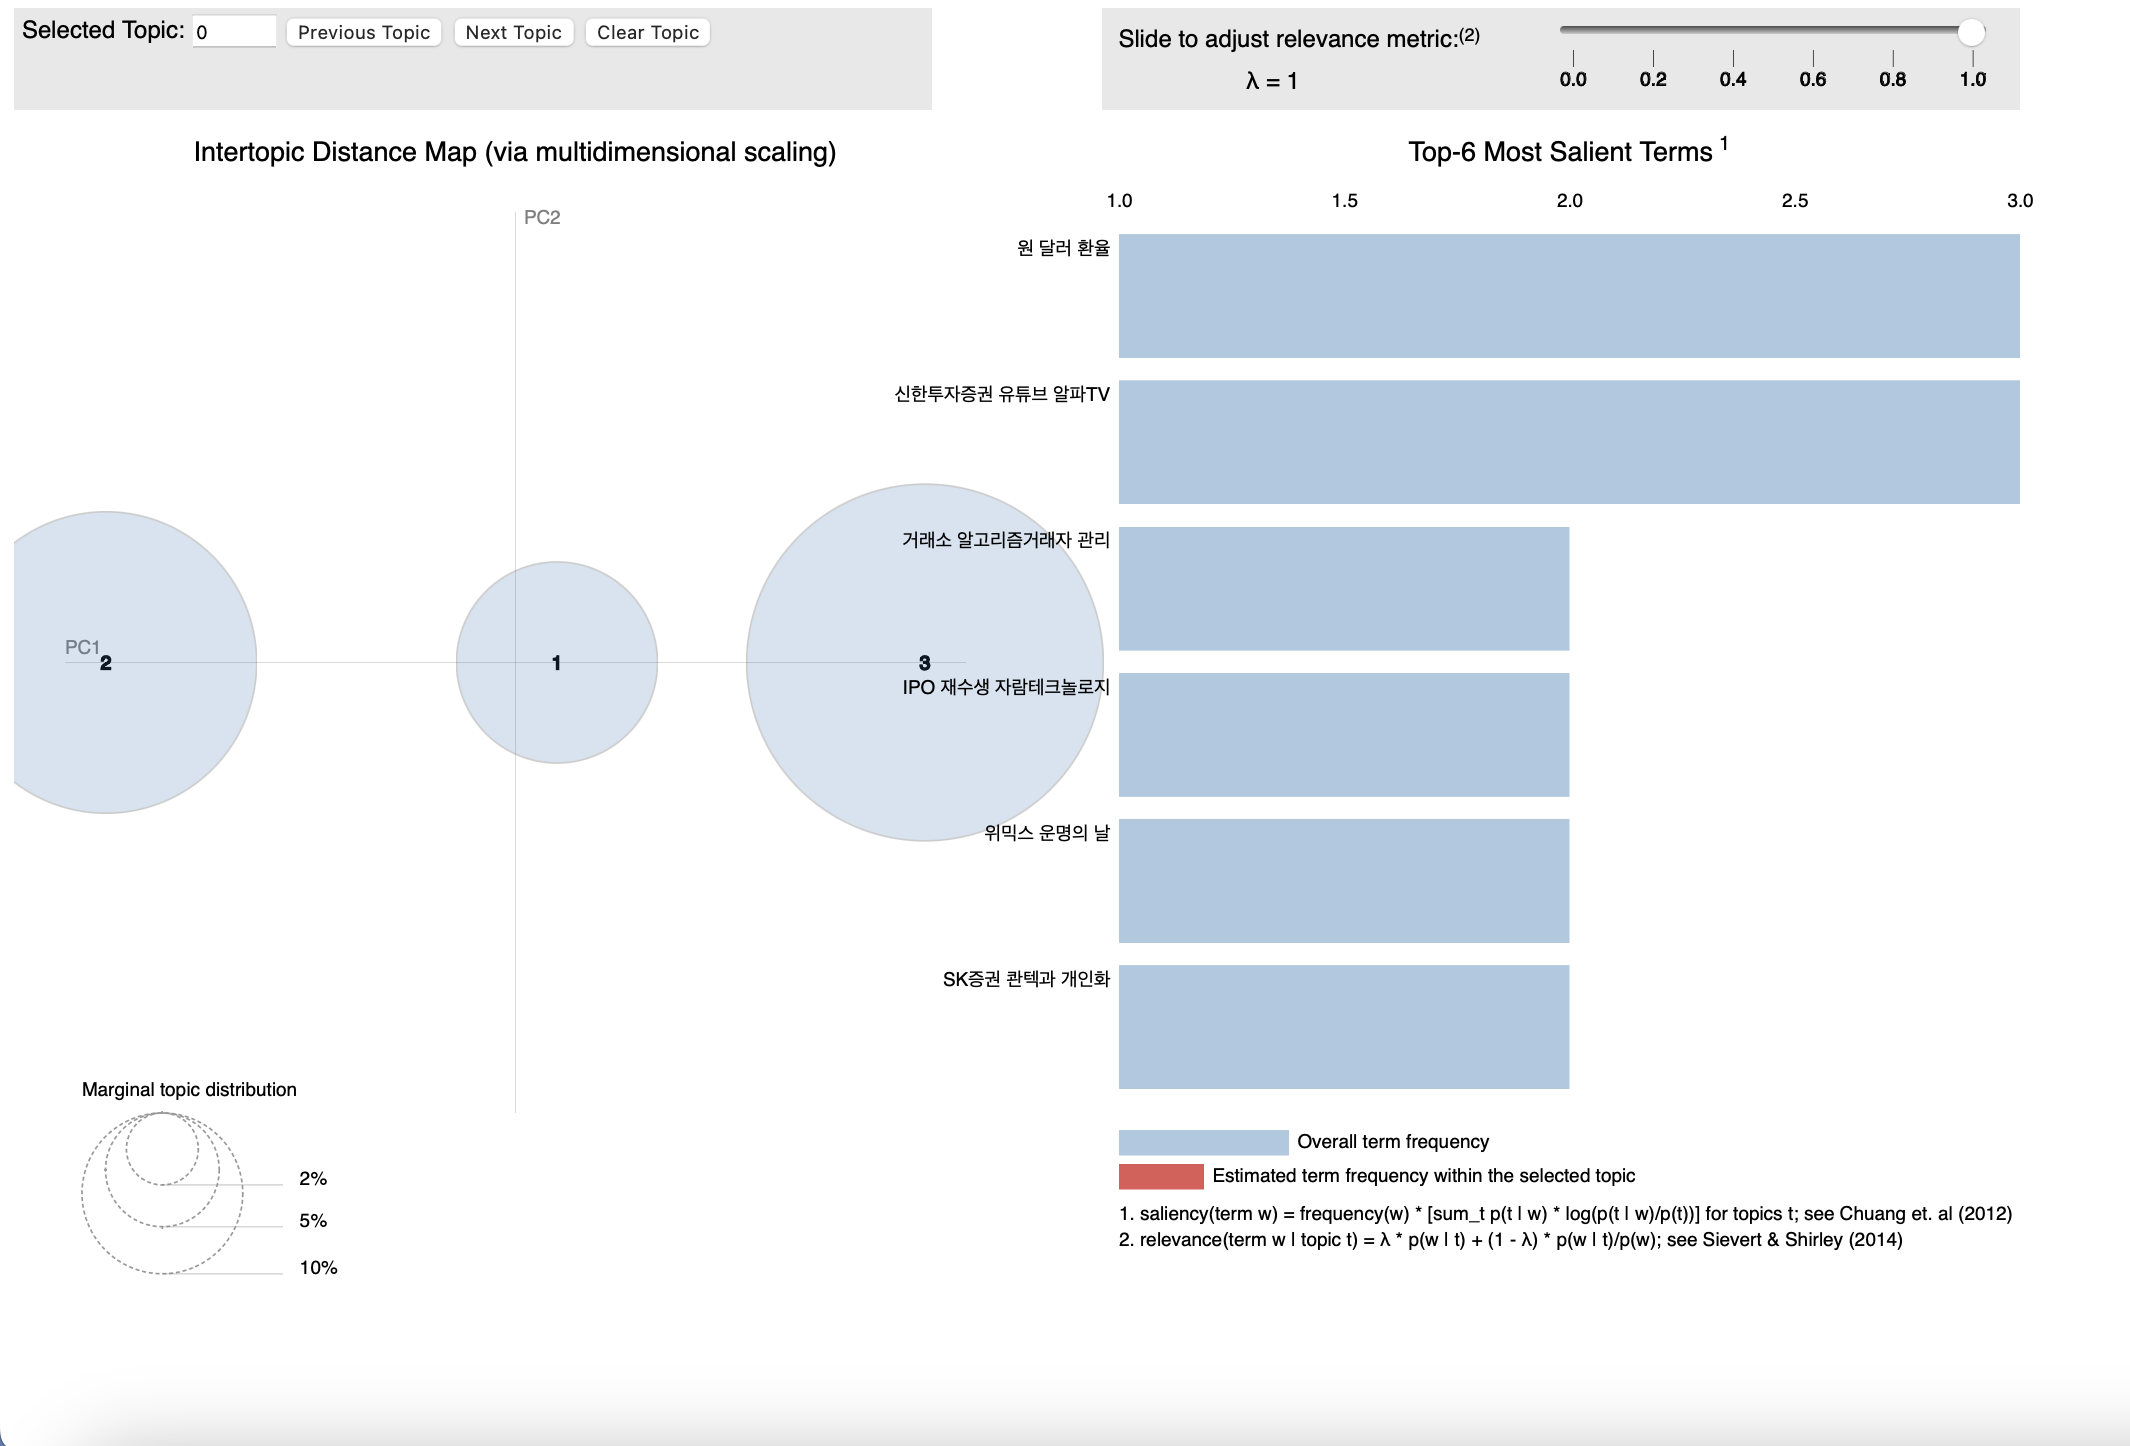